In [1]:
import matplotlib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

random_state = 50
rng = np.random.RandomState(random_state)

# Генерируем данные: два кластера + случайный равномерный "шум"
X_clean = 0.2 * rng.randn(500, 2) + [2, 2]
X_clean_2 = 0.4 * rng.randn(500, 2) + [-1, -2]
X_outliers = rng.uniform(low=-4, high=4, size=(200, 2))
X = np.concatenate([X_clean, X_clean_2, X_outliers])

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X)

### Обычный Isolation Forest

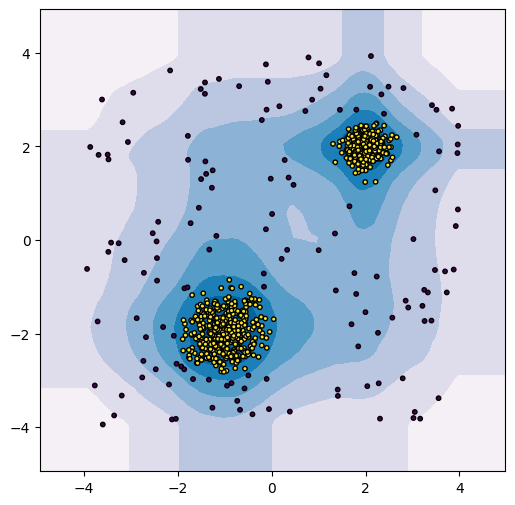

In [3]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import IsolationForest

# Огромное число estimator'ов
clf = IsolationForest(n_estimators=5000)

clf.fit(X_train)

_, ax = plt.subplots(figsize=(6, 6))

DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    response_method="score_samples",
    plot_method="contourf",
    ax=ax,
    cmap="PuBu",
)

b1 = plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=clf.predict(X_train),
    s=10,
    edgecolors="k"
)

plt.show()

Даже при огромном числе estimator'ов Isolation Forest страдает от своей "неповоротной" природы. 

**Линии уровня `outlier score` в оригинальном Isolation Forest имеют строгую тенденцию быть вытягиваться вдоль исходных осей.**

### Rotated Bagging Isolation Forest

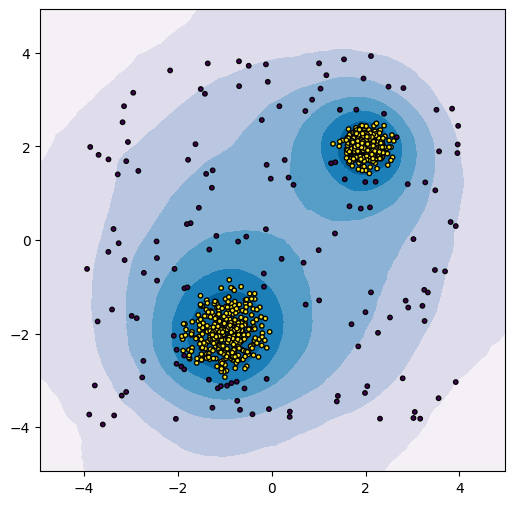

In [15]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import IsolationForest
from rotated_bagging import RotatedIsolationForest

clf = RotatedIsolationForest(
    num_base_estimators=500,
    n_estimators = 10
)

clf.fit(X_train)

_, ax = plt.subplots(figsize=(6, 6))

DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    cmap="PuBu",
)

b1 = plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=clf.predict(X_train),
    s=10,
    edgecolors="k"
)

plt.show()

Видно, что **линии уровня `outlier score` стали гораздо плавнее** и более предсказуемо описывают нашу выборку.